In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine

## use display for html output
from IPython.display import display, HTML

# auto-reload modules
%load_ext autoreload
%autoreload 2

# set pandas display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 1000)

# set dark theme
plt.style.use('dark_background')


In [2]:
raw_data = load_wine()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
for key, val in raw_data.items():
    print(key, type(val))

data <class 'numpy.ndarray'>
target <class 'numpy.ndarray'>
frame <class 'NoneType'>
target_names <class 'numpy.ndarray'>
DESCR <class 'str'>
feature_names <class 'list'>


In [4]:
raw_data["data"].shape, raw_data["target"].shape

((178, 13), (178,))

In [5]:
raw_data["target_names"]

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
raw_data["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [64]:
from utils import load_wine_data
X, Y = load_wine_data()

<AxesSubplot:>

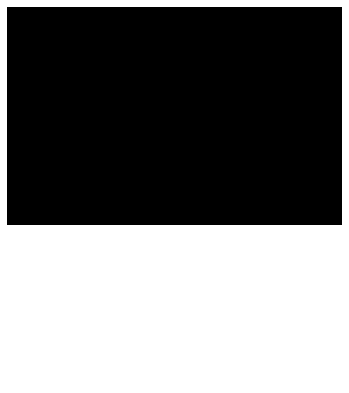

In [8]:
sns.heatmap(X.isna(), cbar=False, cmap=[
            "#000", "blueviolet"], yticklabels=False) # checking for missing values

In [9]:
X.isna().sum() # checking for missing values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [10]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
temp_joined = pd.concat([X, Y], axis=1)

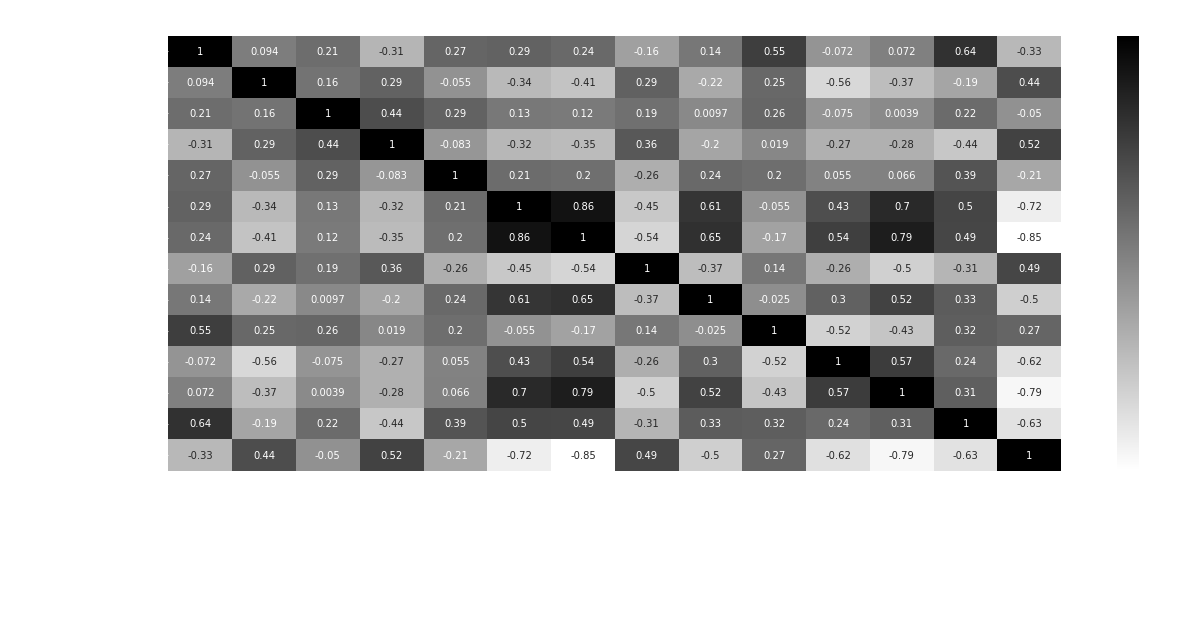

In [39]:
# sns.pairplot(temp_joined, hue="target", palette="pastel") ## not ideal
# confusion matrix
data_corr = temp_joined.corr()
sns.heatmap(data_corr, annot=True, cmap="binary").set_title(
    "Correlation Matrix", fontsize=30)
plt.gcf().set_size_inches(20, 8)


From the above correlation map, I have obeseved that the variables are not correlated with each other. This is a good sign for PCA. Now, I will perform PCA on the data.

Text(0, 0.5, 'Proportion of Variance Explained')

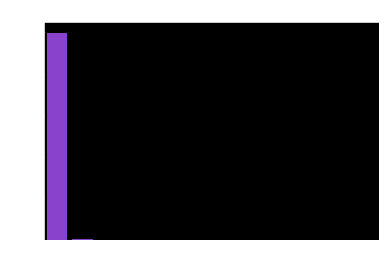

In [51]:
# pca on the dataset 
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit(X)
# show a scree plot
pc_value_labels = np.arange(pca.n_components_) + 1

sns.barplot(x=pc_value_labels, y=pca.explained_variance_ratio_, color="blueviolet")

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

From the above plot we can observe that the first two principal components are able to explain 99% of the variance in the data. This is a good sign for PCA. Now, I will plot the first two principal components.

In [52]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

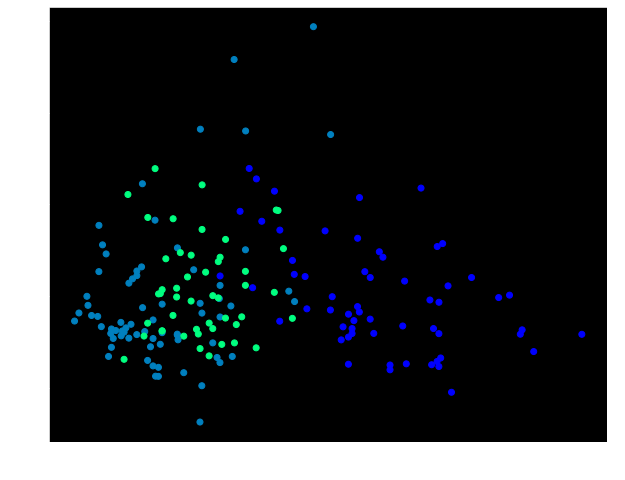

In [53]:
X_pca = pca.transform(X)

# plot the data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y["target"], cmap="winter")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.gcf().set_size_inches(10, 8)


In [55]:
X_pca.shape

(178, 2)

In [63]:
from utils import logistic_reg_accuracy
pca_score = logistic_reg_accuracy(X_pca, Y)
original_score = logistic_reg_accuracy(X, Y)

print(f"Accuracy score on original data: {original_score}")
print(f"Accuracy score on pca data: {pca_score}")


Accuracy score on original data: 0.9722222222222222
Accuracy score on pca data: 0.7222222222222222


e:\Sarath\ML-AI-DataScience\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
